### **4.5** Comparing a Convolutional NN with two 3 by 3 filter and one 5 by 5 filter:

In [ ]:
def createCNN5(input_shape, activation):
  model = Sequential()
  model.add(Conv2D(32, (5, 5), padding='same',input_shape = input_shape))
  model.add(Activation(activation))

  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))


  model.add(Conv2D(64, (5, 5), padding='same'))
  model.add(Activation(activation))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation(activation))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  return model


In [ ]:
def createCNN(input_shape, activation):
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same',input_shape = input_shape))
  model.add(Activation(activation))
  model.add(Conv2D(32, (3, 3), padding='same'))
  model.add(Activation(activation))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation(activation))
  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation(activation))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation(activation))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  return model


In [ ]:
def trainNet(model, x_train, y_train, x_validate, y_validate, batch_size, epochs, data_augmentation, save_best_model):

# train without data augmentation
  if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        shuffle=True,
                        callbacks=[save_best_model])
# train with data augmentation
  else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                        steps_per_epoch=math.ceil(x_train.shape[0]/batch_size),
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        callbacks=[save_best_model])
  return history


In [ ]:
def loadData():
  # Load the data, split between train and test sets:
  (x_train, y_train), (x_test, y_test) = cifar10.load_data()
  # print('x_train shape:', x_train.shape)
  # print(x_train.shape[0], 'train samples')
  # print(x_test.shape[0], 'test samples')

  # Convert class vectors to binary class matrices.
  y_train = keras.utils.to_categorical(y_train, num_classes)
  y_test = keras.utils.to_categorical(y_test, num_classes)
  
  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')
  x_train /= 255
  x_test /= 255
  
  feature_vector_length = 32*32*3
  x_train_flat = x_train.reshape(x_train.shape[0], feature_vector_length)
  x_test_flat = x_test.reshape(x_test.shape[0], feature_vector_length)

  x_validate = x_train[40000:,:]
  x_train = x_train[:40000,:]
  y_validate = y_train[40000:,:]
  y_train = y_train[:40000,:]

  x_validate_flat = x_train_flat[40000:,:]
  x_train_flat = x_train_flat[:40000,:]
  
  return x_train, x_validate, x_test, y_train, y_validate, y_test, x_train_flat, x_validate_flat, x_test_flat 

Not using data augmentation.
Epoch 1/20
1249/1250 [============================>.] - ETA: 0s - loss: 1.8069 - accuracy: 0.3423
Epoch 00001: val_accuracy improved from -inf to 0.45800, saving model to best_model_CNN_3.h5
1250/1250 [==============================] - 8s 6ms/step - loss: 1.8065 - accuracy: 0.3424 - val_loss: 1.5103 - val_accuracy: 0.4580
Epoch 2/20
1244/1250 [============================>.] - ETA: 0s - loss: 1.4678 - accuracy: 0.4687
Epoch 00002: val_accuracy improved from 0.45800 to 0.51350, saving model to best_model_CNN_3.h5
1250/1250 [==============================] - 8s 6ms/step - loss: 1.4676 - accuracy: 0.4687 - val_loss: 1.3639 - val_accuracy: 0.5135
Epoch 3/20
1241/1250 [============================>.] - ETA: 0s - loss: 1.3311 - accuracy: 0.5233
Epoch 00003: val_accuracy improved from 0.51350 to 0.56410, saving model to best_model_CNN_3.h5
1250/1250 [==============================] - 7s 6ms/step - loss: 1.3301 - accuracy: 0.5239 - val_loss: 1.2342 - val_accuracy: 

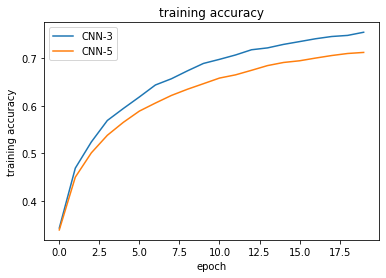

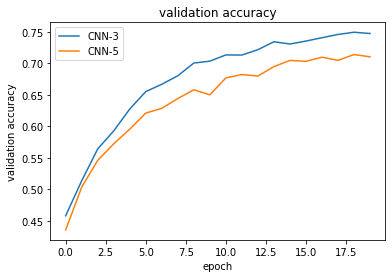

313/313 [==============================] - 1s 3ms/step - loss: 0.7506 - accuracy: 0.7414
Test accuracy for CNN with 3*3 filter: 0.7414000034332275
313/313 [==============================] - 1s 3ms/step - loss: 0.8608 - accuracy: 0.7101
Test accuracy for CNN with 5*5 filter: 0.710099995136261


In [ ]:
# libraries (do not import additional libraries)
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
import math
import matplotlib.pyplot as plt

# parameters for this script
batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = False

x_train, x_validate, x_test, y_train, y_validate, y_test, x_train_flat, x_validate_flat, x_test_flat = loadData()

# Define a convolutional neural network
model_CNN_3 = createCNN(input_shape=x_train.shape[1:], activation = 'relu')
model_CNN_5 = createCNN5(input_shape=x_train.shape[1:],activation ='relu')
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
# Compile the model before using it
model_CNN_3.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model_CNN_5.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


# print(model.summary())

# create a callback that will save the best model while training
save_best_model_CNN_3 = ModelCheckpoint('best_model_CNN_3.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
save_best_model_CNN_5 = ModelCheckpoint('best_model_CNN_5.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

# train model
history_CNN_3 = trainNet(model_CNN_3, x_train, y_train, x_validate, y_validate, batch_size, epochs, data_augmentation, save_best_model_CNN_3)
history_CNN_5 = trainNet(model_CNN_5, x_train, y_train, x_validate, y_validate, batch_size, epochs, data_augmentation, save_best_model_CNN_5)

# Plot training accuracy
plt.plot(history_CNN_3.history['accuracy'])
plt.plot(history_CNN_5.history['accuracy'])

plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['CNN-3','CNN-5'], loc='upper left')
plt.show()

# Plot validation accuracy
plt.plot(history_CNN_3.history['val_accuracy'])
plt.plot(history_CNN_5.history['val_accuracy'])

plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['CNN-3','CNN-5'], loc='upper left')
plt.show()

# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model_CNN_3 = load_model('best_model_CNN_3.h5')
scores = saved_model_CNN_3.evaluate(x_test, y_test, verbose=1)
print('Test accuracy for CNN with 3*3 filter:', scores[1])

saved_model_CNN_5 = load_model('best_model_CNN_5.h5')
scores = saved_model_CNN_5.evaluate(x_test, y_test, verbose=1)
print('Test accuracy for CNN with 5*5 filter:', scores[1])



In practice several reasons have been mentioned for a NN to perform better:


1.   **Complexity of Model**: While comparing above NNs we can easily calculate that number of parameters for the first NN with 3 by 3 filter is more than the 5 by 5 filter network. (The parameter for 3 by 3 = ((3,3,3+1)(64)(2), The parameter for 5 by 5 = ((5,5,3+1)(32)(2)) THis complexity is not always desired and is dependant on the complexity of the data as well but in image datas like this assignment usually the more complex the model the better result is represented (Ofcourse the matter of overfitting comes to picture after a certain level of complexity)

2.   **The depth of NN:** Another factor for NN result accuracy is the depth of network in our first case we have a network with a deeper layers and as a result we get a better accuracy. This could be shown in the work of state of the art architectures such as AlexNet. 

3.   **The neurons field of view:** As a network tends to be deeper the neurons in tha last layer of the achitecture has a 9 pixel info of the previous layer before pooling this is 36 pixels after a padding it would be more. The point being as a neural network getts deeper the architecture helps with the better learning since in each layer we have a different perspective of our data. The closer neurons with a more detailed and specified view and furthur layers with a more general and further perspective of data this helps the NN to learn better which the chance of this happening in a shallow network is smaller.



